#Stroop task!

In a Stroop task, participants are presented with a list of words, with each word displayed in a color of ink. The participant’s task is to say out loud the color of the ink in which the word is printed. The task has two conditions: a congruent words condition, and an incongruent words condition. In the congruent words condition, the words being displayed are color words whose names match the colors in which they are printed: for example RED, BLUE. In the incongruent words condition, the words displayed are color words whose names do not match the colors in which they are printed: for example PURPLE, ORANGE. In each case, we measure the time it takes to name the ink colors in equally-sized lists. Each participant will go through and record a time from each condition.

#### 1. What is our independent variable? What is our dependent variable?

1. independent variable: words condition (congruent and incongruent) <br/>
2. dependent variable: the time it takes to name the ink colors

#### 2. What is an appropriate set of hypotheses for this task? What kind of statistical test do you expect to perform? Justify your choices.

let:

u1 = the time it takes to name the ink colors in incongruent case
u2 = the time it takes to name the ink colors in congruent case

1. Null Hypothesis: u1 = u2 <br/>
2. Alertnative Hypothese: u1 > u2 or u1 < u2 <br/>
3. I will perform a two-tailed statistical test <br/>
4. While the time it takes to name the ink colors in incongruent case should be longer than the time takes in congruent case intuitively, it may happen the other way (maybe participants were more concentrating and trying to perform better in the incongruent case and the result will be interesting), so I will run a two-tailed statistic test to make sure whether the time each participant took to react will be changed by the treatment, no matter it is longer or shorter.

#### 3. Report some descriptive statistics regarding this dataset. Include at least one measure of central tendency and at least one measure of variability.

1. There are 24 participants => N = 24
2. Congruent case => Mean: 14.051  Standard Deviation: 3.559 
3. Incongrunt case => Mean: 22.016  Standard Deviation: 4.797
4. Pairwise time differences between congruent and incongrunt case => Mean: 7.965 Standard Deviation: 4.865
5. More details about central tendency and variability are shown below

In [52]:
import pandas as pd
path = r'~/Documents/stroopdata.csv'

dataFrame = pd.read_csv(path)
dataFrame
dataFrame.count()

Congruent      24
Incongruent    24
dtype: int64

In [50]:
dataFrame.describe()

,Congruent,Incongruent
count,24.000000,24.000000
mean,14.051125,22.015917
std,3.559358,4.797057
min,8.630000,15.687000
25%,11.895250,18.716750
50%,14.356500,21.017500
75%,16.200750,24.051500
max,22.328000,35.255000


In [17]:
(dataFrame['Incongruent'] - dataFrame['Congruent']).mean()

7.964791666666667

In [18]:
(dataFrame['Incongruent'] - dataFrame['Congruent']).std()

4.864826910359056

#### 4. Provide one or two visualizations that show the distribution of the sample data. Write one or two sentences noting what you observe about the plot or plots.

Plot1 & Plot2 below shows the time it takes to name the ink colors in incongruent situation is more then the time it takes in Congruent situation for everyone of the participants.

Plot3 is much more interesting, I try to find the correlation bewteen the two case, since, intuitively , the one spend more time in the Congruent case should also spend more time in the Incongruent case. However ,the result shows that the correlation is not strong (only 0.35).



Populating the interactive namespace from numpy and matplotlib


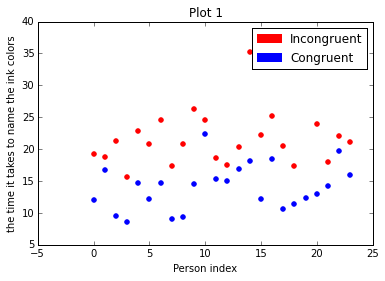

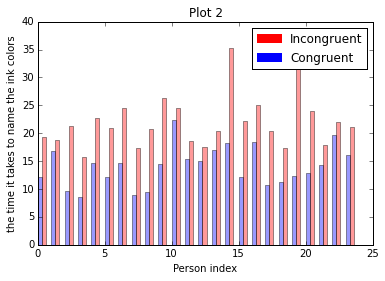

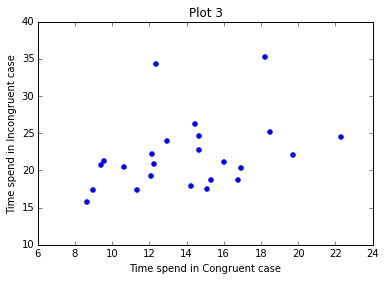

,Congruent,Incongruent
Congruent,1.00000,0.35182
Incongruent,0.35182,1.00000


In [39]:
%pylab inline

import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

#---Plot 1

plt.scatter(x=dataFrame.index, y=dataFrame['Congruent'], color='blue', label='Congruent')
plt.scatter(x=dataFrame.index, y=dataFrame['Incongruent'], color='red', label='Incongruent')

blue_patch = mpatches.Patch(color='red', label='Incongruent')
red_patch = mpatches.Patch(color='blue', label='Congruent')
plt.legend(handles=[blue_patch,red_patch])

plt.xlabel("Person index")
plt.ylabel("the time it takes to name the ink colors")
plt.title("Plot 1")
plt.show()

#---Plot 2

barWidth = 0.30
plt.bar(dataFrame.index, dataFrame['Congruent'], barWidth, alpha=0.4, color="blue", label='Congruent')
plt.bar(dataFrame.index+barWidth, dataFrame['Incongruent'], barWidth, alpha=0.4, color="red", label='Incongruent')
blue_patch = mpatches.Patch(color='red', label='Incongruent')
red_patch = mpatches.Patch(color='blue', label='Congruent')
plt.legend(handles=[blue_patch,red_patch])
plt.ylabel("the time it takes to name the ink colors")
plt.xlabel("Person index")
plt.title("Plot 2")
plt.show()

#---Plot 3

plt.scatter(x=dataFrame['Congruent'], y=dataFrame['Incongruent'], color='blue', label='Congruent')
plt.xlabel("Time spend in Congruent case")
plt.ylabel("Time spend in Incongruent case")
plt.title("Plot 3")
plt.show()

dataFrame.corr()

#### 5. Now, perform the statistical test and report your results. What is your confidence level and your critical statistic value? Do you reject the null hypothesis or fail to reject it? Come to a conclusion in terms of the experiment task. Did the results match up with your expectations?

1. mean of pairwise differences = 7.965
2. std of pairwise differences = 4.865
3. SE = 4.865 / (24)^0.5 = 0.993
4. t-statistic = (7.965 - 0) / 0.993 = 8.02
5. using alpha = 0.01 (confidence level = 0.99) <br/>
6. t-critical (for two tailed test, df = 23) = +-2.807 <br/>

report in APA format:

1. t(23)=+-2.807, p=.01, two-tailed
2. 99% CI = (5.178,10.752)
3. r^2 = 0.74

t-statistic is much larger than t-critical, so I can reject the null hypothesis. It's match up with my expectation.<br/>


Moreover, even I change my Null-hypothesis to be u1 - u2 <= 5, and the Alternative-hypothesis to be u1 - u2 > 5. <br/>
(using the u1 and u2 I defined in question 2) <br/>
I still have t-statistic as 2.986 and can reject the Null-hypothesis with the same alpha. <br/>


#### 6. Optional: What do you think is responsible for the effects observed? Can you think of an alternative or similar task that would result in a similar effect? Some research about the problem will be helpful for thinking about these two questions!

1. Knowing the meaning of the word is one of the main reasons that cause the confusion. If we use other language that we don't know to perform the test, like Arabic, it may not show any significant differences for the time it takes to name the ink in Congruent and Incongruent cases.<br/><br/>

2. We can use music to do some similar tests, if we ask the participant to listen notes and show the name of the notes (like do, re, mi ...) in the same time, for those who have absolute pitch may feel much more difficult to name the note than normal people without any musical training.